In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from datetime import datetime as dt
import dateutil

In [2]:
tomato_data = pd.read_csv("Price of Tomato Karnataka(2016-2018).csv",
                          names= ["Market Area",'Date',"Tonnes","Variety","Minimum Price(Rs./Quintal)",
                                  "Maximum Price(Rs./Quintal)","Modal Price(Rs./Quintal)"], 
                          skiprows = 1,
                          sep = ',', engine = 'python'
                       )

In [3]:
tomato_data['Modal Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Modal Price(Rs./Quintal)'], errors='coerce')
tomato_data['Minimum Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Minimum Price(Rs./Quintal)'], errors='coerce')
tomato_data['Maximum Price(Rs./Quintal)'] = pd.to_numeric(tomato_data['Maximum Price(Rs./Quintal)'], errors='coerce')

In [4]:
tomato_data = tomato_data.dropna()
tomato_data[tomato_data.isnull().any(axis=1)]

,Market Area,Date,Tonnes,Variety,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)


In [5]:
ml_tomato_data = tomato_data.drop(['Date','Variety'], axis=1)

from sklearn import preprocessing
# Converting categorical data to numeric form
le = preprocessing.LabelEncoder()
ml_tomato_data['Market Area'] = le.fit_transform(ml_tomato_data['Market Area'].astype(str))
ml_tomato_data.tail()

,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
11451,35,33.0,166.0,600.0,266.0
11452,35,55.0,233.0,700.0,400.0
11453,35,43.0,200.0,466.0,300.0
11454,39,6.0,900.0,1100.0,1000.0
11455,39,5.0,900.0,1100.0,1000.0


In [6]:
ml_tomato_data.describe()

,Market Area,Tonnes,Minimum Price(Rs./Quintal),Maximum Price(Rs./Quintal),Modal Price(Rs./Quintal)
count,11286.000000,11286.000000,11286.000000,11286.000000,11286.000000
mean,17.558037,80.351763,865.686691,1614.727096,1277.500177
std,11.816802,155.098364,925.624774,1385.597676,1125.409306
min,0.000000,1.000000,22.000000,100.000000,70.000000
25%,7.000000,4.000000,300.000000,600.000000,500.000000
50%,13.000000,19.000000,500.000000,1000.000000,900.000000
75%,30.000000,70.000000,1000.000000,2135.000000,1748.500000
max,39.000000,1931.000000,9000.000000,10000.000000,9000.000000


In [7]:
from sklearn.model_selection import train_test_split

X = ml_tomato_data.drop('Modal Price(Rs./Quintal)', axis=1)

y = ml_tomato_data['Modal Price(Rs./Quintal)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [8]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 500, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.01, 'loss': 'ls'}
# no. of estimators = no. of boosting stages to use in our model, max_depth of every regression tree(very high tends to overfit
# min_samples_split specifies the min mo. of sample before a node can split, here atleast 2 samples is required to split 
# existing node, loss calulation uses least squares regression)
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.01, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=500, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [9]:
gbr_model.score(X_train, y_train)

0.9907754543010587

In [10]:
X_train["Market Area"]

9125      7
11168     2
3755      9
2238      7
8271      5
408       8
4590      8
8972     32
3316      9
322       1
3700      7
1911     10
1315     31
7331     36
5576     35
1539     10
7072     10
4519      5
8804     10
9126      7
8563     31
6062      1
5378      9
5644      2
5763      9
2552     32
1915     10
4104      5
5744      8
2279      8
         ..
7600     22
1872      9
2047     29
7878      7
4852     35
5073     19
2164      0
6037     35
6922      1
6217     10
11231     9
538      30
9949      7
2898     14
7769      1
2223      5
10414     8
2600     35
706       7
3469     28
6745     28
5875     24
4374     32
7892      8
9234     11
4860     35
3265      6
9901      4
10914    11
2733      7
Name: Market Area, Length: 7900, dtype: int64

Populating the interactive namespace from numpy and matplotlib


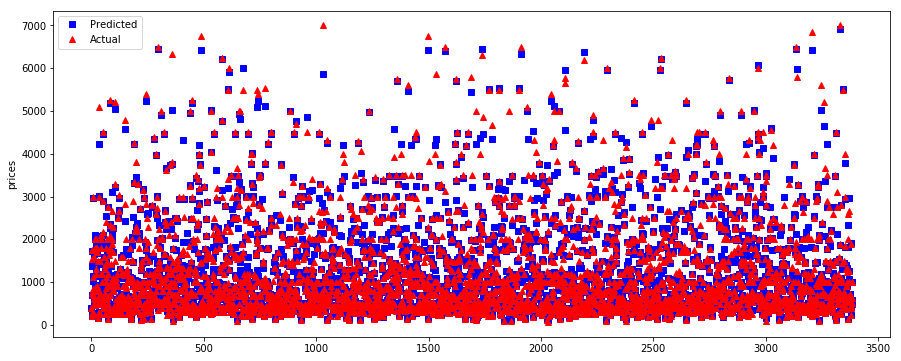

In [11]:
y_predict = gbr_model.predict(X_test)

%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.plot(y_predict, 'bs', label='Predicted')
plt.plot(y_test.values, 'r^', label='Actual')
plt.ylabel('prices')

plt.legend()
plt.show()

Populating the interactive namespace from numpy and matplotlib


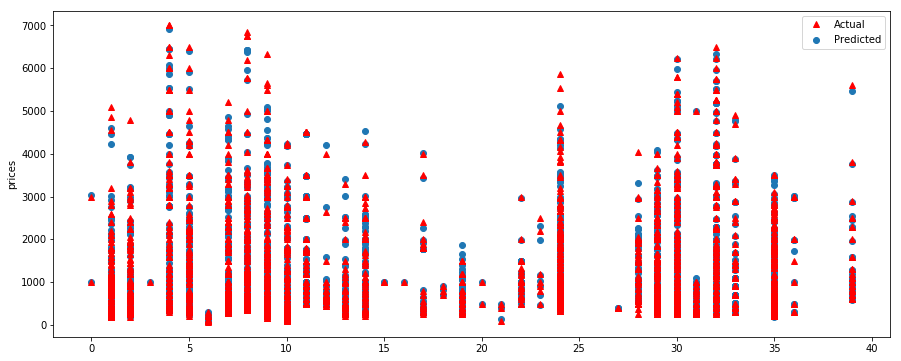

In [12]:
y_predict = gbr_model.predict(X_test)

%pylab inline
pylab.rcParams['figure.figsize'] = (15,6)
plt.scatter(X_test["Market Area"],y_predict, label='Predicted')
plt.plot(X_test["Market Area"],y_test.values, 'r^',label='Actual')
plt.ylabel('prices')

plt.legend()
plt.show()

In [13]:
r_square = gbr_model.score(X_test, y_test)
r_square

0.9790138110645821

In [14]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

26716.8660755387

In [15]:
import math
math.sqrt(gbr_model_mse)

163.45294758901932

In [16]:
from sklearn.model_selection import GridSearchCV

num_estimators = [100,200,500]
learn_rates = [0.01, 0.02, 0.05, 0.1]
max_depths = [4,6,8]
param_grid = {'n_estimators': num_estimators, 'learning_rate': learn_rates, 'max_depth': max_depths}

grid_search = GridSearchCV(GradientBoostingRegressor(min_samples_split=2, loss= 'ls'), param_grid, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

grid_search.best_params_

{'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 100}

In [17]:
from sklearn.ensemble import GradientBoostingRegressor

params = {'n_estimators': 100, 'max_depth': 6, 'min_samples_split': 2, 'learning_rate': 0.1, 'loss': 'ls'}
# no. of estimators = no. of boosting stages to use in our model, max_depth of every regression tree(very high tends to overfit
# min_samples_split specifies the min mo. of sample before a node can split, here atleast 2 samples is required to split 
# existing node, loss calulation uses least squares regression)
gbr_model = GradientBoostingRegressor(**params)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=6, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [18]:
gbr_model.score(X_train, y_train)

0.9934695800748846

In [19]:
r_square = gbr_model.score(X_test, y_test)
r_square

0.9792956653260138

In [20]:
from sklearn.metrics import mean_squared_error

gbr_model_mse = mean_squared_error(y_predict, y_test)
gbr_model_mse

26716.8660755387

In [21]:
import math
math.sqrt(gbr_model_mse)

163.45294758901932